<a href="https://colab.research.google.com/github/TerryHilario/TerryHilario/blob/main/fbprophet_TA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pystan fbprophet

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import date
import holidays

In [ ]:

data = pd.read_csv("/content/BBCA.JK.csv") 
data.head(5)
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,13175.0,13425.0,13150.0,13225.0,12190.282227,15495900.0
1,2016-01-05,13200.0,13550.0,13200.0,13375.0,12328.543945,19321800.0
2,2016-01-06,13325.0,13500.0,13200.0,13200.0,12167.236328,21074000.0
3,2016-01-07,13100.0,13150.0,13000.0,13000.0,11982.885742,29349300.0
4,2016-01-08,12950.0,13100.0,12950.0,13000.0,11982.885742,25164000.0
...,...,...,...,...,...,...,...
1014,2019-12-20,33400.0,33700.0,33050.0,33300.0,32184.109375,19890600.0
1015,2019-12-23,33400.0,33650.0,33250.0,33300.0,32184.109375,9311700.0
1016,2019-12-26,33300.0,33625.0,33300.0,33400.0,32280.757813,7637700.0
1017,2019-12-27,33350.0,33500.0,33350.0,33475.0,32353.246094,5989000.0


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1.018000e+03
mean,21376.178782,21537.917485,21209.012770,21381.434185,20269.392113,1.518444e+07
std,5895.697591,5927.260563,5854.392701,5898.616916,5847.801941,1.102139e+07
min,12650.000000,12825.000000,12625.000000,12750.000000,11752.445313,0.000000e+00
25%,15500.000000,15600.000000,15400.000000,15500.000000,14474.025391,9.645000e+06
50%,21512.500000,21937.500000,21400.000000,21587.500000,20530.732422,1.372030e+07
75%,26056.250000,26293.750000,25900.000000,26187.500000,24965.757813,1.885085e+07
max,33500.000000,34000.000000,33350.000000,33775.000000,32643.193359,2.125723e+08


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)
data['Date'] = data.index


In [ ]:

# Select date and price features from dataset
data = data[["Date", "Adj Close"]]
# Rename the features for the model fitting
data = data.rename(columns = {"Date":"ds", "Adj Close":"y"})
data.head(5)

,ds,y
Date,,
2016-01-04,2016-01-04,12190.282227
2016-01-05,2016-01-05,12328.543945
2016-01-06,2016-01-06,12167.236328
2016-01-07,2016-01-07,11982.885742
2016-01-08,2016-01-08,11982.885742


In [ ]:
# Fit the model using all data (past 6 months data)
m = Prophet(daily_seasonality = True)
m.fit(data)

In [ ]:
data

,ds,y
Date,,
2016-01-04,2016-01-04,12190.282227
2016-01-05,2016-01-05,12328.543945
2016-01-06,2016-01-06,12167.236328
2016-01-07,2016-01-07,11982.885742
2016-01-08,2016-01-08,11982.885742
...,...,...
2019-12-20,2019-12-20,32184.109375
2019-12-23,2019-12-23,32184.109375
2019-12-26,2019-12-26,32280.757813


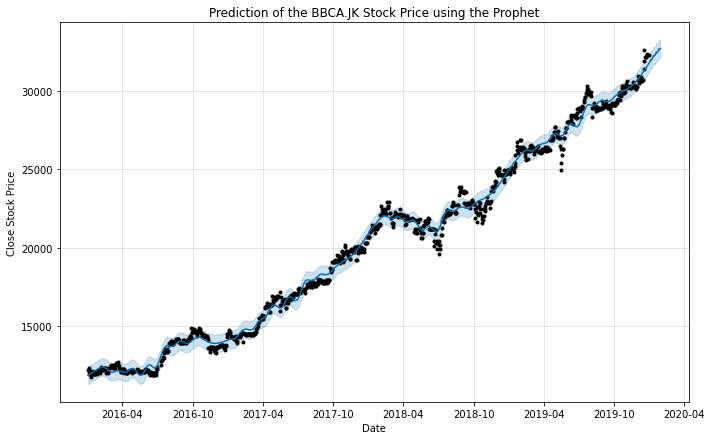

In [ ]:

# Plot the model with next 30 days forcast
future = m.make_future_dataframe(periods=30)
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the BBCA.JK Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-04,11860.404670,11326.276409,12388.548060
1,2016-01-05,11882.676510,11294.958366,12446.380230
2,2016-01-06,11902.133094,11349.813294,12470.677982
3,2016-01-07,11924.241471,11390.613477,12468.945603
4,2016-01-08,11947.528838,11372.682978,12540.603250
...,...,...,...,...
1044,2020-01-25,32654.053269,32075.779624,33183.107105
1045,2020-01-26,32685.039072,32109.246298,33281.926031
1046,2020-01-27,32650.096464,32080.390305,33235.851030
1047,2020-01-28,32682.509048,32138.951806,33235.632447


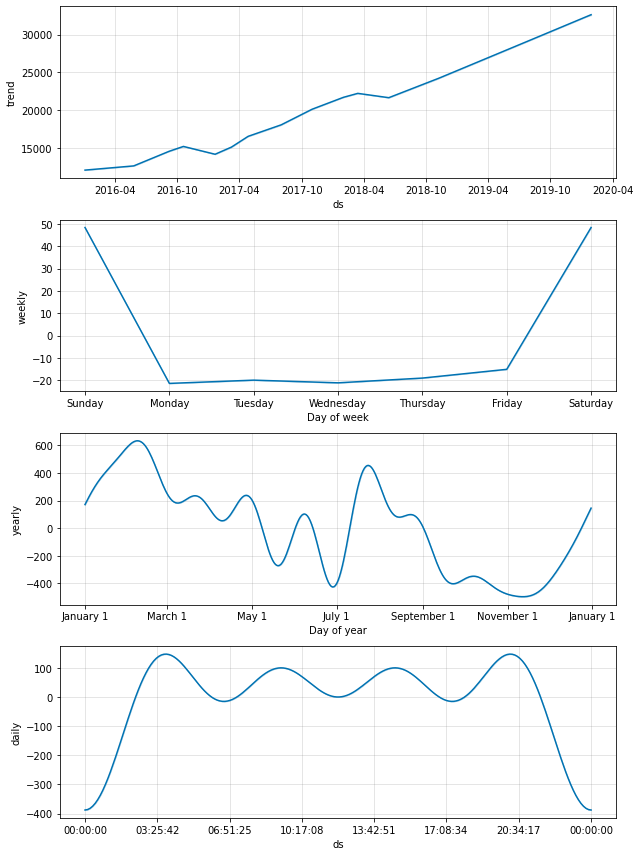

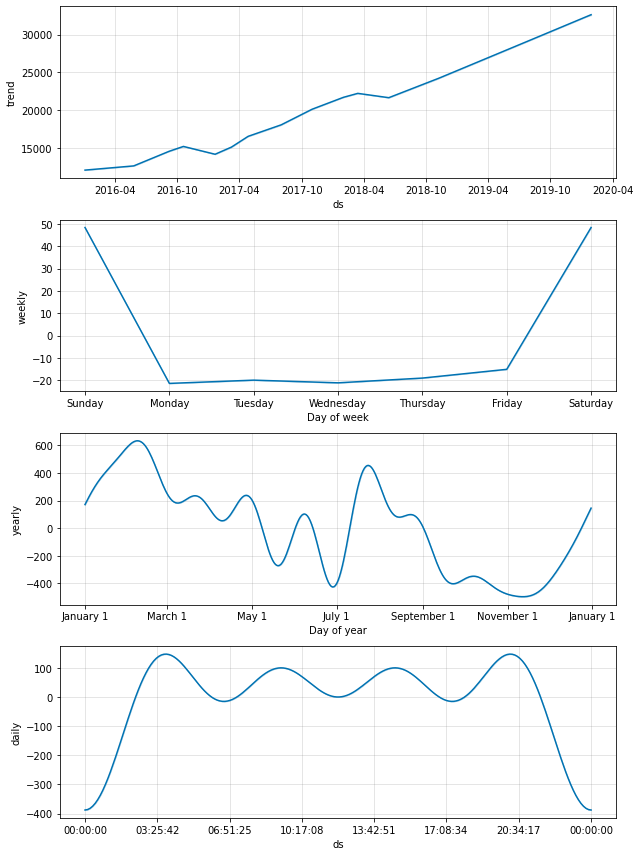

In [ ]:
m.plot_components(prediction)